In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from tqdm import tqdm

print("\u2022 Using TensorFlow Version:", tf.__version__)
print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)
print('\u2022 GPU Device Found.' if tf.test.is_gpu_available() else '\u2022 GPU Device Not Found. Running on CPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


• Using TensorFlow Version: 2.12.0
• Using TensorFlow Hub Version:  0.13.0
• GPU Device Found.


# Load Data dari Penyimpanan G-Drive

In [3]:
train_dir = '/content/drive/MyDrive/Product-based Project - Paddycure/Machine Learning/Dataset/dataset-mix/train'
valid_dir = '/content/drive/MyDrive/Product-based Project - Paddycure/Machine Learning/Dataset/dataset-mix/valid'

In [4]:
train_bacterial_blight_dir = os.path.join(train_dir, 'bacterial_blight')
train_brown_spot_dir = os.path.join(train_dir, 'brown_spot')
train_healthy_dir = os.path.join(train_dir, 'healthy')
train_hispa_dir = os.path.join(train_dir, 'hispa')
train_leaf_blast_dir = os.path.join(train_dir, 'leaf_blast')
train_leaf_smut_dir = os.path.join(train_dir, 'leaf_smut')
train_tungro_dir = os.path.join(train_dir, 'tungro')

valid_bacterial_blight_dir = os.path.join(valid_dir, 'bacterial_blight')
valid_brown_spot_dir = os.path.join(valid_dir, 'brown_spot')
valid_healthy_dir = os.path.join(valid_dir, 'healthy')
valid_hispa_dir = os.path.join(valid_dir, 'hispa')
valid_leaf_blast_dir = os.path.join(valid_dir, 'leaf_blast')
valid_leaf_smut_dir = os.path.join(valid_dir, 'leaf_smut')
valid_tungro_dir = os.path.join(valid_dir, 'tungro')

In [5]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + " files"

print('total images for training :', count(train_dir))
print('total images for validation :', count(valid_dir))

total images for training : /content/drive/MyDrive/Product-based Project - Paddycure/Machine Learning/Dataset/dataset-mix/train : 1248 files
total images for validation : /content/drive/MyDrive/Product-based Project - Paddycure/Machine Learning/Dataset/dataset-mix/valid : 133 files


In [6]:
print(f"Images of 'BACTERIAL BLIGHT' for training: {len(os.listdir(train_bacterial_blight_dir))}")
print(f"Images of 'BROWN SPOT' for training: {len(os.listdir(train_brown_spot_dir))}")
print(f"Images of 'HEALTHY' for training: {len(os.listdir(train_healthy_dir))}")
print(f"Images of 'HISPA' for training: {len(os.listdir(train_hispa_dir))}")
print(f"Images of 'LEAF BLAST' for training: {len(os.listdir(train_leaf_blast_dir))} ")
print(f"Images of 'LEAF SMUT' for training: {len(os.listdir(train_leaf_smut_dir))} ")
print(f"Images of 'TUNGRO' for training: {len(os.listdir(train_tungro_dir))} \n")

print(f"Images of 'BACTERIAL BLIGHT' for validation: {len(os.listdir(valid_bacterial_blight_dir))}")
print(f"Images of 'BROWN SPOT' for validation: {len(os.listdir(valid_brown_spot_dir))}")
print(f"Images of 'HEALTHY' for validation: {len(os.listdir(valid_healthy_dir))}")
print(f"Images of 'HISPA' for validation: {len(os.listdir(valid_hispa_dir))}")
print(f"Images of 'LEAF BLAST' for validation: {len(os.listdir(valid_leaf_blast_dir))} ")
print(f"Images of 'LEAF SMUT' for validation: {len(os.listdir(valid_leaf_smut_dir))} ")
print(f"Images of 'TUNGRO' for validation: {len(os.listdir(valid_tungro_dir))} \n")

Images of 'BACTERIAL BLIGHT' for training: 282
Images of 'BROWN SPOT' for training: 216
Images of 'HEALTHY' for training: 126
Images of 'HISPA' for training: 126
Images of 'LEAF BLAST' for training: 198 
Images of 'LEAF SMUT' for training: 103 
Images of 'TUNGRO' for training: 197 

Images of 'BACTERIAL BLIGHT' for validation: 29
Images of 'BROWN SPOT' for validation: 24
Images of 'HEALTHY' for validation: 14
Images of 'HISPA' for validation: 14
Images of 'LEAF BLAST' for validation: 22 
Images of 'LEAF SMUT' for validation: 10 
Images of 'TUNGRO' for validation: 20 



# Melihat Data Gambar

In [ ]:
bacterial_blight = [train_dir + '/bacterial_blight/' + img for img in os.listdir(train_dir + '/bacterial_blight')[:3]]
brown_spot = [train_dir + '/brown_spot/' + img for img in os.listdir(train_dir + '/brown_spot')[:3]]
healthy = [train_dir + '/healthy/' + img for img in os.listdir(train_dir + '/healthy')[:3]]
hispa = [train_dir  + '/hispa/' + img for img in os.listdir(train_dir + '/hispa')[:3]]
leaf_blast = [train_dir  + '/leaf_blast/' + img for img in os.listdir(train_dir + '/leaf_blast')[:3]]
leaf_smut = [train_dir  + '/leaf_smut/' + img for img in os.listdir(train_dir + '/leaf_smut')[:3]]
tungro = [train_dir  + '/tungro/' + img for img in os.listdir(train_dir + '/tungro')[:3]]

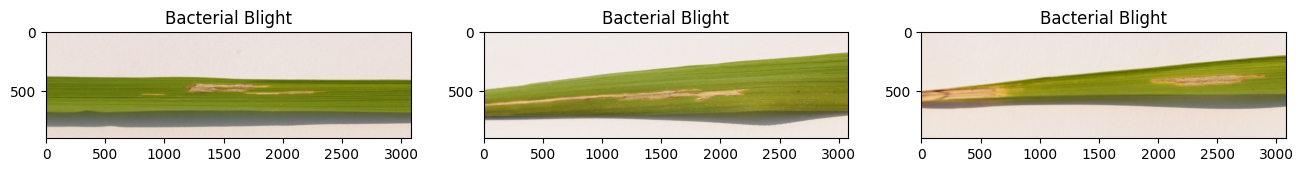

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(bacterial_blight):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Bacterial Blight")

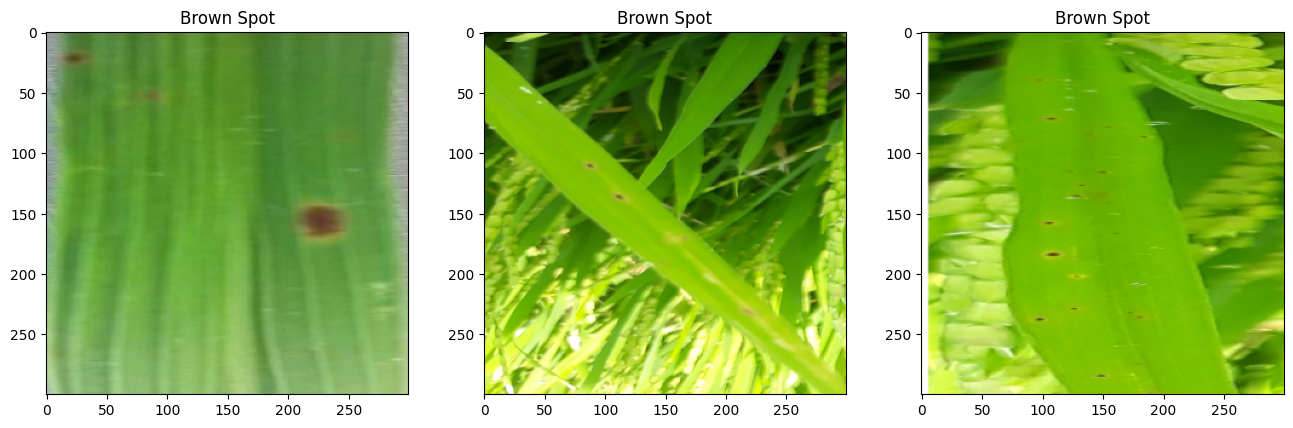

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brown_spot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

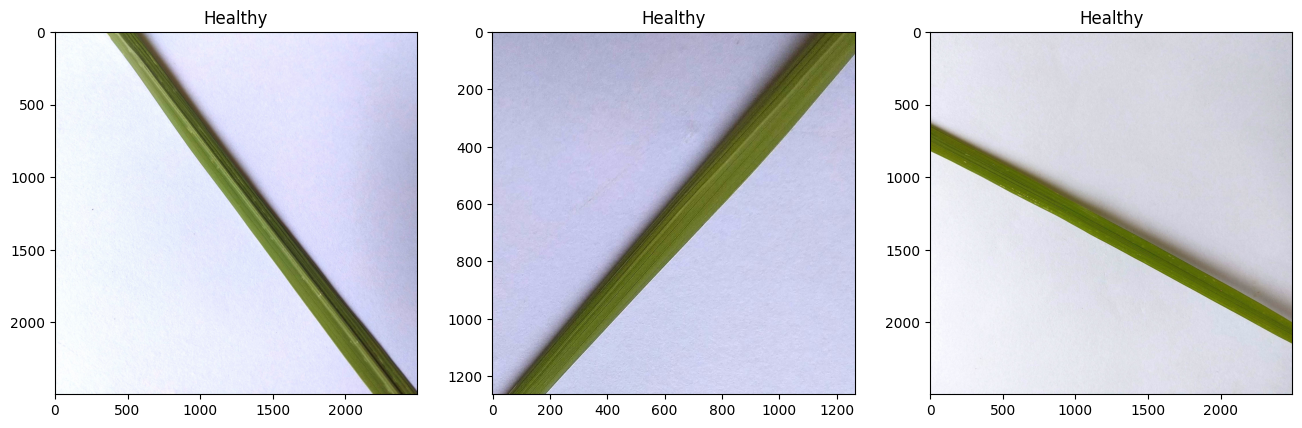

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

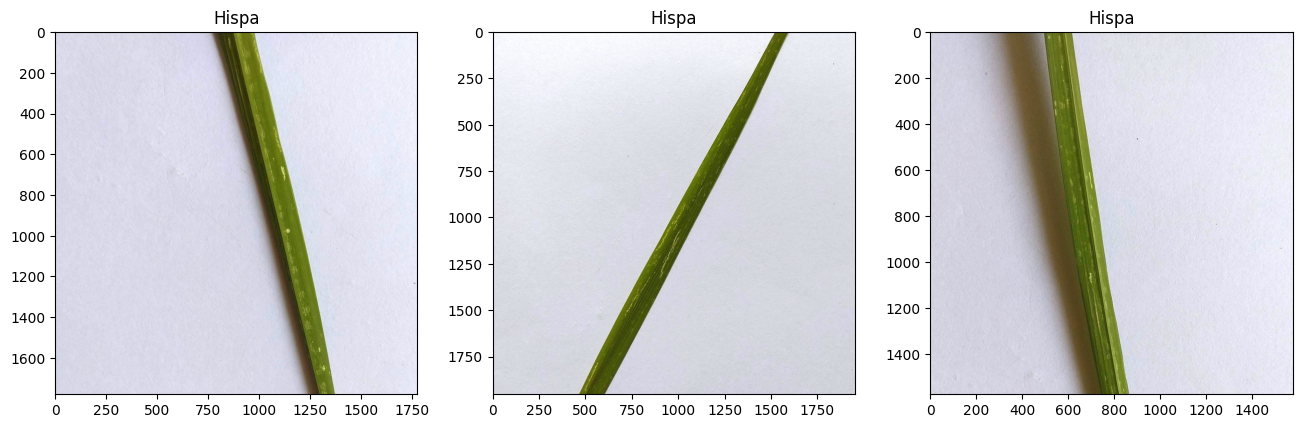

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(hispa):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Hispa")

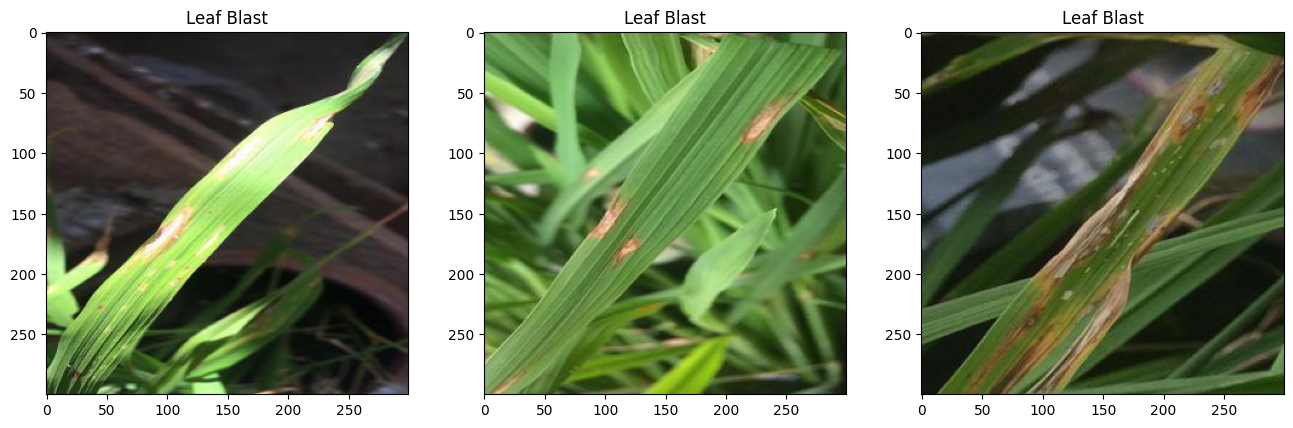

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(leaf_blast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blast")

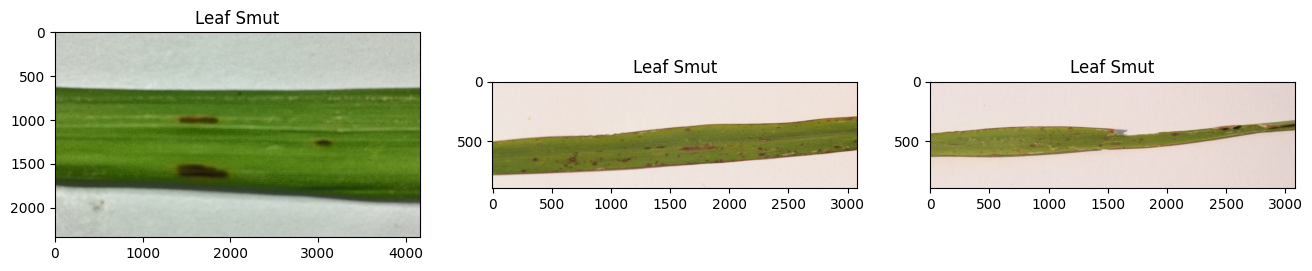

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(leaf_smut):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Smut")

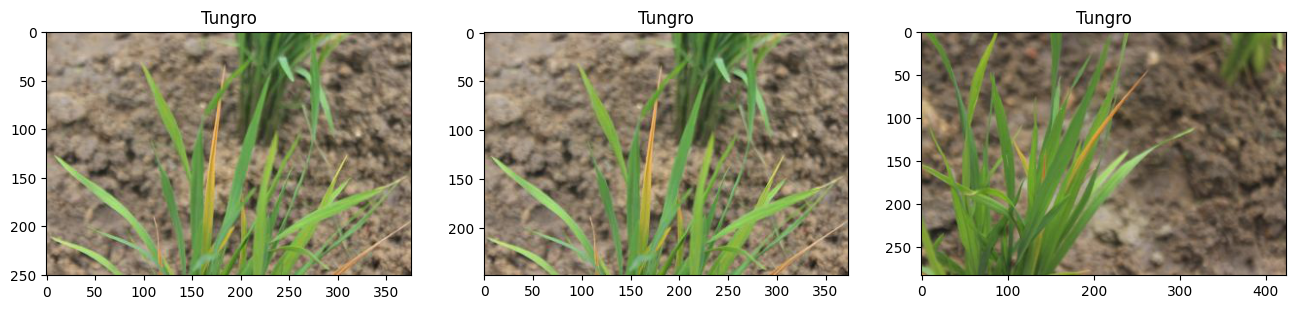

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(tungro):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Tungro")

# Ekstrak Pre-Trained Model MobileNetV3

In [7]:
module_selection = ("mobilenet_v3_large_100_224", 224, 1280)
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/imagenet/{}/feature_vector/5".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5 with input size (224, 224) and output dimension 1280


In [8]:
do_fine_tuning = True

In [9]:
BATCH_SIZE = 32

In [10]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,),
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

# Image Augmentation

In [11]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')

training_generator = train_datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    shuffle=False,
    seed=42,
    color_mode="rgb",
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 1248 images belonging to 7 classes.
Found 133 images belonging to 7 classes.


In [12]:
class_names = os.listdir(train_dir)

print(class_names)

training_generator.class_names = class_names
validation_generator.class_names = class_names

NUM_CLASSES = len(class_names)

['tungro', 'leaf_smut', 'healthy', 'leaf_blast', 'bacterial_blight', 'hispa', 'brown_spot']


In [ ]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# def one_hot_label(image, label):
#     label = tf.one_hot(label, NUM_CLASSES)
#     return image, label

# train_ds = training_generator.map(one_hot_label, num_parallel_calls=AUTOTUNE)
# val_ds = validation_generator.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [ ]:
# train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

# Struktur Model

In [13]:
print("Building model with", MODULE_HANDLE)

model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4226432   
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)      

In [14]:
#@title (Optional) Unfreeze some layers
NUM_LAYERS = 64

if do_fine_tuning:
    feature_extractor.trainable = True

    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

else:
    feature_extractor.trainable = False

In [15]:
if do_fine_tuning:
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
else:
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Menentukan Callbacks

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.85):
      self.model.stop_training = True
      print("\nThe accuracy of the training set has reached > 90% and val_accuracy > 80%!")
callbacks = myCallback()

In [ ]:
# EPOCHS=50

# history = model.fit(
#         train_ds,
#         epochs=EPOCHS,
#         validation_data=val_ds,
#         callbacks = [callbacks])

# Training Model

In [17]:
EPOCHS=20

history = model.fit(
        training_generator,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks = [callbacks])

Epoch 1/20
39/39 [==============================] - 820s 20s/step - loss: 1.2156 - accuracy: 0.6474 - val_loss: 1.6111 - val_accuracy: 0.6165
Epoch 2/20
39/39 [==============================] - 89s 2s/step - loss: 0.7845 - accuracy: 0.8117 - val_loss: 1.2926 - val_accuracy: 0.7218
Epoch 3/20
39/39 [==============================] - 90s 2s/step - loss: 0.6902 - accuracy: 0.8606 - val_loss: 1.0795 - val_accuracy: 0.8045
Epoch 4/20
39/39 [==============================] - 89s 2s/step - loss: 0.5695 - accuracy: 0.8958 - val_loss: 0.8464 - val_accuracy: 0.8271
Epoch 5/20
39/39 [==============================] - 88s 2s/step - loss: 0.5653 - accuracy: 0.9054 - val_loss: 1.9172 - val_accuracy: 0.6391
Epoch 6/20
39/39 [==============================] - 89s 2s/step - loss: 0.5200 - accuracy: 0.9151 - val_loss: 2.1665 - val_accuracy: 0.6316
Epoch 7/20
39/39 [==============================] - 92s 2s/step - loss: 0.5065 - accuracy: 0.9135 - val_loss: 1.1070 - val_accuracy: 0.8045
Epoch 8/20
39/39 [

# Visualisasi Hasil Training

Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy:0.9551281929016113\nValidation Accuracy: 0.932330846786499')

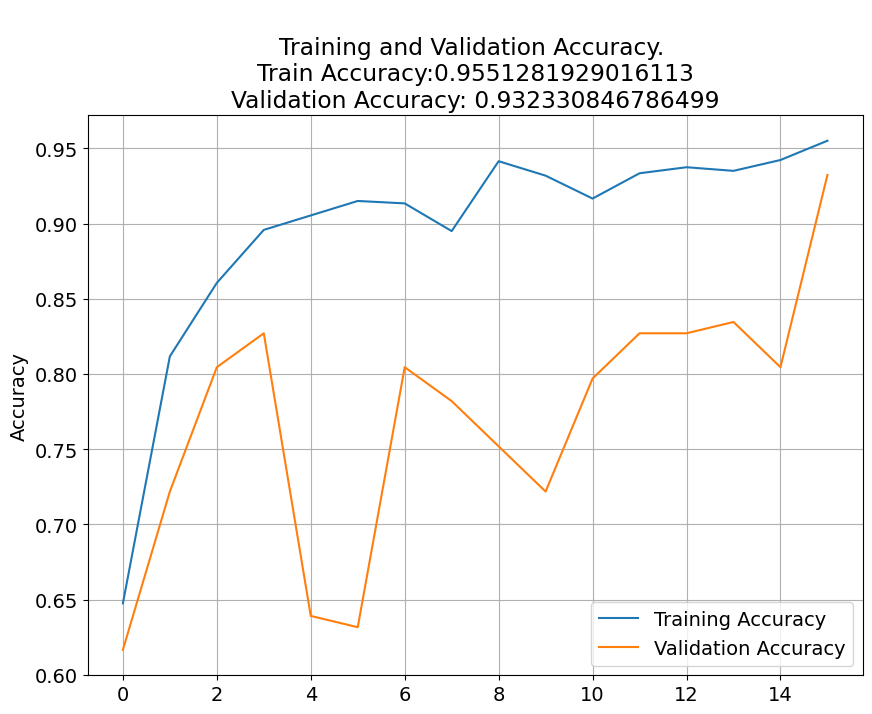

In [18]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

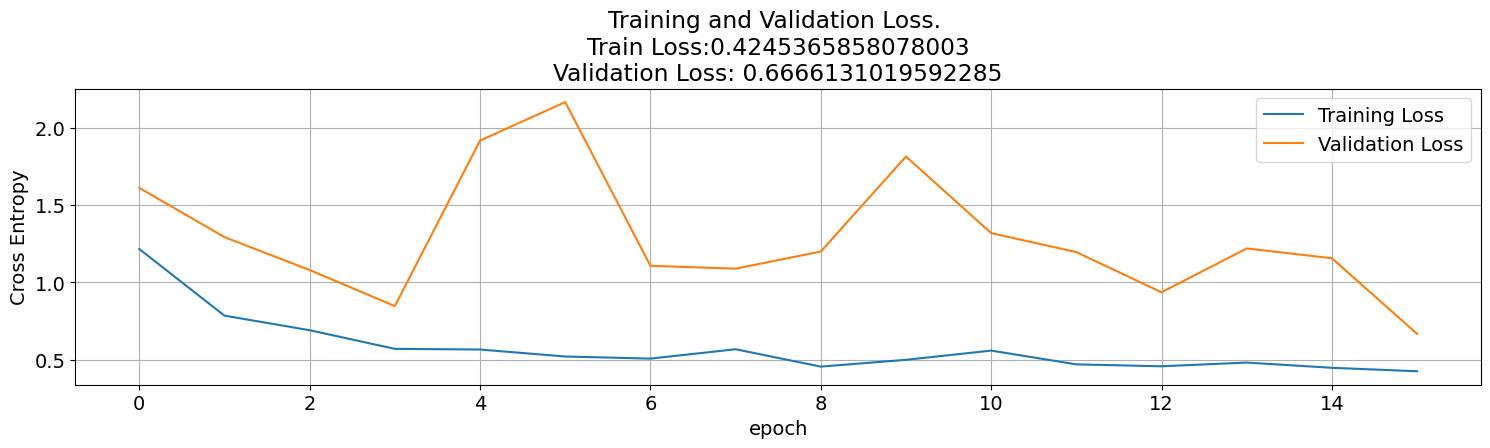

In [19]:
# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss:{str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

# Save Model

In [ ]:
saved_model_path = '/content/drive/MyDrive/Machine Learning/model-mix'

In [ ]:
tf.saved_model.save(model, saved_model_path)

In [ ]:
# !tensorflowjs_converter \
#     --input_format=keras_saved_model \
#     /content/drive/MyDrive/Machine Learning/merged_model_1_95-841684242780 \
#     /tmp/linear

In [ ]:
model.save('/content/drive/MyDrive/Machine Learning/model-mix/model-mix.h5')

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/Machine Learning/model-mix')